In [1]:
# Ensure that local modules are reloaded when edited
%load_ext autoreload
%autoreload 2

# Ensure that plots are displayed
%matplotlib inline

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

https://machinelearningmastery.com/training-the-transformer-model/

In [3]:
from time import time

In [4]:
from utils.dataset import Dataset
from utils.enums import EncodingCategorical, EncodingNumerical

dataset_name='medium_debug_v2-0.15-4_1.json.gz'
prefix=True
pretrain_percentage=0.0
w2v_vector_size=20
w2v_window_size=4
categorical_encoding=EncodingCategorical.WORD_2_VEC
numerical_encoding=EncodingNumerical.MIN_MAX_SCALING
fs_save=None

dataset = Dataset(dataset_name, 
                      beta=0.005, 
                      prefix=prefix,
                      pretrain_percentage=pretrain_percentage,
                      w2v_vector_size=w2v_vector_size,
                      w2v_window_size=w2v_window_size, 
                      categorical_encoding=categorical_encoding,
                      numerical_encoding=numerical_encoding,
                      fs_save=fs_save)

c:\Users\ronal\miniconda3\envs\rcvdb-thesis-bpad\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EncodingNumerical.MIN_MAX_SCALING EncodingNumerical.MIN_MAX_SCALING
0.0 81.0
0.0 1.0
EncodingNumerical.MIN_MAX_SCALING EncodingNumerical.MIN_MAX_SCALING
0.0 159.0
0.0 1.0
EncodingNumerical.MIN_MAX_SCALING EncodingNumerical.MIN_MAX_SCALING
0.0 27.0
0.0 1.0
EncodingNumerical.MIN_MAX_SCALING EncodingNumerical.MIN_MAX_SCALING
0.0 54.0
0.0 1.0
EncodingNumerical.MIN_MAX_SCALING EncodingNumerical.MIN_MAX_SCALING
0.0 12.0
0.0 1.0
Feature Columns: dict_keys(['name', 'arrival_time', 'company', 'country', 'department', 'global_workload_D', 'global_workload_h', 'local_workload_D', 'local_workload_h', 'user'])
Feature Shape: (35483, 13)
Case Length: [ 2  2  3 ...  8 10 10]
Attribute Types: [<AttributeType.CATEGORICAL: 0>, <AttributeType.NUMERICAL: 1>, <AttributeType.CATEGORICAL: 0>, <AttributeType.CATEGORICAL: 0>, <AttributeType.CATEGORICAL: 0>, <AttributeType.NUMERICAL: 1>, <AttributeType.NUMERICAL: 1>, <AttributeType.NUMERICAL: 1>, <AttributeType.NUMERICAL: 1>, <AttributeType.CATEGORICAL: 0>]
Enc

# W2V Encoding

In [5]:
from utils.embedding.w2v import ProcessWord2Vec
import numpy as np

In [6]:
dataset.case_lens[0:20]

array([2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 4, 5, 5, 5, 5, 3, 2, 3, 3])

In [7]:
np.mean(dataset.case_lens)

5.491164783135586

In [8]:
dataset.features[0].shape

(35483, 13)

In [9]:
np.set_printoptions(linewidth=200)
dataset.features[2][0:20]

array([[ 1., 82.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 82.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 82., 83.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 82., 83.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 82.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 82.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 84., 85.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 84., 85., 85.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 82., 83., 86.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 82., 83., 86.,  2.,  0., 

In [10]:
np.set_printoptions(linewidth=300)
dataset.features[5][0:20]

array([[0.        , 0.01886792, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01886792, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01886792, 0.01886792, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01886792, 0.22012579, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.22012579, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.22012579, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.

In [11]:
w2v_encoder = ProcessWord2Vec(
            encoders=dataset.encoders,
            pretrain_percentage=dataset.pretrain_percentage,
            attribute_types=dataset.attribute_types,
            event_attribute_keys=dataset.event_log.event_attribute_keys,
            features=dataset._features,
            event_log=dataset.event_log,
            vector_size=dataset.w2v_vector_size,
            window=dataset.w2v_window_size,
            fs_save=dataset.fs_save) 

In [12]:
w2v_features, numeric_features, numeric_feature_names, w2v_feature_names = w2v_encoder.encode_features(average=False, match_numerical=True)

In [13]:
# (num_attribute, num_cases, num_events, vector_size) 
print(w2v_features.shape)
transposed_w2v_features = np.transpose(w2v_features, (1, 2, 0, 3))
print(transposed_w2v_features.shape)

(5, 35483, 13, 20)
(35483, 13, 5, 20)


In [14]:
print(numeric_features.shape)
transposed_numeric_features = np.transpose(numeric_features, (1, 2, 0, 3))
print(transposed_numeric_features.shape)

(5, 35483, 13, 20)
(35483, 13, 5, 20)


In [15]:
dataset.case_lens[13]

5

In [16]:
transposed_numeric_features[12,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.07749242, 0.1545188 , 0.23061587, 0.30532598, 0.37819985, 0.4487992 , 0.5166994 , 0.58149207, 0.64278764, 0.70021737, 0.99699295, 0.98798984, 0.9730449 , 0.95224786, 0.92572397, 0.89363265, 0.8561669 , 0.8135521 , 0.76604444, 0.7139297 ],
       [0.11609291, 0.23061587, 0.34202015, 0.4487992 , 0.549509  , 0.64278764, 0.72737366, 0.8021232 , 0.8660254 , 0.9182161 , 0.99323833, 0.9730449 , 0.9396926 , 0.89363265, 0.8354878 , 0.76604444, 0.6862416 , 0.5971586 , 0.5       , 0.39607978],
    

In [17]:
transposed_w2v_features[12,:,0]

array([[-0.01569275,  0.03015446, -0.03076373, -0.0099005 , -0.02991541, -0.0049784 , -0.01010493,  0.04242973,  0.00039001, -0.04287663, -0.02714549, -0.03437993,  0.01346191,  0.04728324, -0.02907998,  0.04132513,  0.04266026, -0.0353132 , -0.04441606,  0.04734592],
       [ 0.02424864, -0.03082013,  0.01259593,  0.0036972 , -0.01696077, -0.00489612,  0.04989563,  0.04572944, -0.02230915,  0.04541513, -0.02820882,  0.02965461, -0.01548609,  0.01715876,  0.01508613,  0.03450231, -0.01186942,  0.04387518,  0.03794714, -0.04773823],
       [-0.04004105, -0.03818948,  0.01461629, -0.01397361, -0.0346476 , -0.04064132,  0.0415459 ,  0.00995244, -0.04664009, -0.02396358,  0.01568369, -0.02356603,  0.02640421, -0.02116721,  0.01320898, -0.04022844,  0.03104943,  0.02409444,  0.00393596,  0.01506724],
       [ 0.04776092, -0.03678212, -0.03635194, -0.01132694, -0.0038928 , -0.01608052, -0.00296293,  0.03744411, -0.00348759, -0.0081247 ,  0.013722  , -0.0417955 ,  0.03927902,  0.04268052, -0.

In [18]:
# Shapes of the input data
num_traces, num_events, num_numeric_features, vector_size = transposed_numeric_features.shape
_, _, num_w2v_features, _ = transposed_w2v_features.shape

# Initialize the merged array
merged_features = np.zeros((num_traces, num_events, num_numeric_features + num_w2v_features, vector_size))

# Keep track of the current indices for numeric and w2v features
numeric_index, w2v_index = 0, 0

# Iterate over dataset.attribute_keys to place each feature in the correct order
for i, key in enumerate(dataset.attribute_keys):
    # print(key)
    if key in numeric_feature_names:
        # print("Numeric feature shape:", transposed_numeric_features[:, :, numeric_index, :].shape)
        # print("Target shape:", merged_features[:, :, i, :].shape)
        # print(numeric_index)
        # Place numeric feature in the merged array
        merged_features[:, :, i, :] = transposed_numeric_features[:, :, numeric_index, :]
        numeric_index += 1
    elif key in w2v_feature_names:
        # print("W2V feature shape:", transposed_w2v_features[:, :, w2v_index, :].shape)
        # print("Target shape:", merged_features[:, :, i, :].shape)
        # print(w2v_index)
        # Place w2v feature in the merged array
        merged_features[:, :, i, :] = transposed_w2v_features[:, :, w2v_index, :]
        w2v_index += 1
    else:
        raise ValueError(f"Unexpected attribute key '{key}' not found in either feature list.")

# The merged array now has features interlaced according to dataset.attribute_keys order
print("Merged features shape:", merged_features.shape)

Merged features shape: (35483, 13, 10, 20)


In [19]:
dataset.case_lens[10:20]

array([2, 4, 5, 5, 5, 5, 3, 2, 3, 3])

In [20]:
merged_features[12][4]

array([[ 0.00890996, -0.0341445 , -0.04862406,  0.04520292,  0.03099027, -0.03456464,  0.01701741,  0.00103032,  0.02376873, -0.03559972,  0.02013477,  0.02173717,  0.04978685, -0.0223687 , -0.00694632, -0.03658661, -0.04848915, -0.04540129, -0.00511377, -0.03251645],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.03949034, -0.03494752, -0.04577933, -0.00177876, -0.0154992 ,  0.03947159,  0.02969287, -0.00772831,  0.00755482,  0.0089502 ,  0.03908785, -0.04755094, -0.00102766,  0.01734598, -0.00469486,  0.04190886,  0.04505392,  0.03268253, -0.00355811,  0.03855202],
       [-0.04801775,  0.02503647, -0.04379793, -0.02195913, -0.0001755 , -0.00148091, -0.0383062 ,  0.04807372,  0.02491029,  0.04616572, -0.04078959,  0.02247899, -0.02068538,  0.00412268,  0.

In [21]:
zero_event = np.zeros((num_numeric_features + num_w2v_features, vector_size))

trainX = []
trainY = []
for case, length in zip(merged_features, dataset.case_lens):
    last_event_index = length - 1
    trainY.append(case[length - 1].copy())

    # Remove the target event from the training data
    case[length - 1] = zero_event
    trainX.append(case)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [22]:
trainX.shape

(35483, 13, 10, 20)

In [23]:
trainY.shape

(35483, 10, 20)

In [24]:
trainY[4]

array([[ 2.42486410e-02, -3.08201313e-02,  1.25959273e-02,  3.69720464e-03, -1.69607699e-02, -4.89611644e-03,  4.98956256e-02,  4.57294360e-02, -2.23091487e-02,  4.54151332e-02, -2.82088164e-02,  2.96546109e-02, -1.54860914e-02,  1.71587579e-02,  1.50861321e-02,  3.45023051e-02, -1.18694184e-02,
         4.38751802e-02,  3.79471406e-02, -4.77382317e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.28278465e-03,  1.41328154e-02,  2.70071439e-02,  3.52632813e-02, -2.85156071e-02,  9.29409824e-03,  3.04443184e-02, -2.39902548e-02, -1.55363027e-02,  3.39881480e-02,  8.15737806e-03,  9.49585461e-04,  1.73681863e-02,  1.08888745e-03,  4.80941311e-02,  2.53030173e-02, -4.458

In [25]:
trainX[4,0]

array([[-0.01569275,  0.03015446, -0.03076373, -0.0099005 , -0.02991541, -0.0049784 , -0.01010493,  0.04242973,  0.00039001, -0.04287663, -0.02714549, -0.03437993,  0.01346191,  0.04728324, -0.02907998,  0.04132513,  0.04266026, -0.0353132 , -0.04441606,  0.04734592],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.04267167,  0.01603553, -0.02318999, -0.02544478,  0.01794809,  0.0268517 ,  0.03884757, -0.02883253,  0.0371668 ,  0.03312748, -0.018549  , -0.04372821,  0.02718734,  0.03254878, -0.00393775, -0.03354928, -0.03542963, -0.0124853 ,  0.02571627, -0.01832619],
       [ 0.00386665, -0.04247889,  0.03904903,  0.04628646, -0.01371164,  0.00400112,  0.00373326,  0.02738943, -0.04303039,  0.00292228,  0.03434711,  0.01115797,  0.00562338, -0.04661078,  0.

In [26]:
dim0, dim1, dim2, dim3 = trainX.shape
trainX = np.reshape(trainX, (dim0, dim1, dim2 * dim3))#, order='C')
trainX = np.reshape(trainX, (dim0, dim1 * dim2 * dim3))#, order='C')
trainX.shape

(35483, 2600)

In [27]:
dim0, dim1, dim2 = trainY.shape
trainY = np.reshape(trainY, (dim0, dim1 * dim2))#, order='C')
trainY.shape

(35483, 200)

# Token Encoding

In [28]:
features = np.array(dataset.features)
cases = np.transpose(features, (1, 2, 0))

In [29]:
# Debug Prints
print(features.shape)
print(cases.shape)
print(len(dataset.case_lens))
print(dataset.attribute_types)
print(dataset.event_log.event_attribute_keys)

(10, 35483, 13)
(35483, 13, 10)
35483
[<AttributeType.CATEGORICAL: 0>, <AttributeType.NUMERICAL: 1>, <AttributeType.CATEGORICAL: 0>, <AttributeType.CATEGORICAL: 0>, <AttributeType.CATEGORICAL: 0>, <AttributeType.NUMERICAL: 1>, <AttributeType.NUMERICAL: 1>, <AttributeType.NUMERICAL: 1>, <AttributeType.NUMERICAL: 1>, <AttributeType.CATEGORICAL: 0>]
['name', 'arrival_time', 'company', 'country', 'department', 'global_workload_D', 'global_workload_h', 'local_workload_D', 'local_workload_h', 'user']


In [30]:
# Categorical filter TODO make sure the transformer model can also handle numerical values via multitask learning
from utils.enums import AttributeType

# Create a boolean mask for categorical attributes
categorical_mask = np.array(dataset.attribute_types) == AttributeType.CATEGORICAL
print(categorical_mask)
num_categorical_features = np.sum(categorical_mask)

# Use this mask to filter out only the categorical attributes in the last axis
categorical_cases = cases[..., categorical_mask]
print(categorical_cases.shape)

[ True False  True  True  True False False False False  True]
(35483, 13, 5)


In [89]:
categorical_keys = []
for type, key in zip(dataset.attribute_types, dataset.event_log.event_attribute_keys):
    if type == AttributeType.CATEGORICAL:
        categorical_keys.append(key)
print(categorical_keys)

['name', 'company', 'country', 'department', 'user']


In [31]:
print(dataset.case_lens)

[ 2  2  3 ...  8 10 10]


In [32]:
zero_event = np.zeros((num_categorical_features))
print(zero_event.shape)

trainX_categorical = []
trainY_categorical = []
for index, (case, case_length) in enumerate(zip(categorical_cases, dataset.case_lens)):
    last_event_index = case_length - 1
    trainY_categorical.append(case[last_event_index].copy())

    # Remove the target event from the training data
    case[last_event_index] = zero_event
    trainX_categorical.append(case)

trainX_categorical = np.array(trainX_categorical, dtype=np.int64)
trainY_categorical = np.array(trainY_categorical, dtype=np.int64)

print(trainX_categorical.shape)
print(trainY_categorical.shape)

(5,)
(35483, 13, 5)
(35483, 5)


In [33]:
dim0, dim1, dim2 = trainX_categorical.shape
trainX_categorical = np.reshape(trainX_categorical, (dim0, dim1 * dim2))#, order='C')
trainX_categorical.shape

(35483, 65)

In [34]:
print(trainX_categorical[12])

[  1   1   1   1   1   5  82  91 113 135   6  83  92 115 137   9  86  98 120 144   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [35]:
trainX_categorical[12,0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [36]:
trainX_categorical[12,5:]

array([  5,  82,  91, 113, 135,   6,  83,  92, 115, 137,   9,  86,  98, 120, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int64)

In [37]:
trainY_categorical[0:20]

array([[  5,  82,  91, 113, 135],
       [  5,  82,  91, 114, 136],
       [  6,  83,  92, 115, 137],
       [  6,  83,  92, 116, 138],
       [  5,  84,  93, 117, 139],
       [  5,  82,  94, 118, 140],
       [  5,  84,  93, 117, 139],
       [  5,  84,  93, 117, 139],
       [  5,  82,  95, 114, 141],
       [  7,  85,  96, 119, 142],
       [  5,  84,  93, 117, 139],
       [  8,  85,  97, 119, 143],
       [  2,   2,   2,   2,   2],
       [  2,   2,   2,   2,   2],
       [  2,   2,   2,   2,   2],
       [  2,   2,   2,   2,   2],
       [  7,  82,  91, 118, 145],
       [  5,  84,  93, 117, 139],
       [  6,  83,  95, 115, 146],
       [  7,  85,  96, 119, 142]], dtype=int64)

In [38]:
print(trainY_categorical[12])

[2 2 2 2 2]


In [39]:
vocab_size = 0
for encoder in dataset.encoders.values():
    largest_index = encoder.largest_attribute()
    if largest_index > vocab_size:
        vocab_size = largest_index + 1

In [40]:
vocab_size

235

# Online Process Transformer Implementation

In [41]:
from keras.optimizers import Adam # type: ignore
from keras.metrics import Mean # type: ignore
from tensorflow import data, train, GradientTape, function # type: ignore

from novel.transformer.components.transformer import TransformerModel
from novel.transformer.components.utils import LRScheduler, loss_fcn, accuracy_fcn, likelihood_fcn

In [42]:
# Define the model parameters

h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_model = 512  # Dimensionality of model layers' outputs
d_ff = 2048  # Dimensionality of the inner fully connected layer
n = 6  # Number of layers in the encoder stack

# Define the training parameters
batch_size = 64
beta_1 = 0.9
beta_2 = 0.98
epsilon = 1e-9
dropout_rate = 0.1

# Instantiate an Adam optimizer
optimizer = Adam(LRScheduler(d_model), beta_1, beta_2, epsilon)

# Prepare the training and test splits of the dataset
# dataset = PrepareDataset()
# trainX, trainY, train_orig, enc_seq_length, dec_seq_length, enc_vocab_size, dec_vocab_size = dataset('english-german-both.pkl')
# print(f'X Length: {trainX.shape}')
enc_seq_length = trainX_categorical.shape[1]
dec_seq_length = trainY_categorical.shape[1]
# h = 10

print(enc_seq_length, "Encoding Sequence Length")
print(dec_seq_length, "Decoding Sequence Length")


# d_model = enc_seq_length
# d_ff = enc_seq_length

# Prepare the dataset batches
train_dataset = data.Dataset.from_tensor_slices((trainX_categorical, trainY_categorical))
train_dataset = train_dataset.batch(batch_size)

# Create model
training_model = TransformerModel(
    enc_seq_length, 
    dec_seq_length, 
    h, d_k, 
    d_v, 
    d_model, 
    d_ff, 
    n, 
    dropout_rate,
    enc_vocab_size=vocab_size,
    dec_vocab_size=vocab_size)

# Include metrics monitoring
train_loss = Mean(name='train_loss')
train_accuracy = Mean(name='train_accuracy')
train_likelihood = Mean(name='train_likelihood')

# Create a checkpoint object and manager to manage multiple checkpoints
ckpt = train.Checkpoint(model=training_model, optimizer=optimizer)
ckpt_manager = train.CheckpointManager(ckpt, "./checkpoints", max_to_keep=3)

65 Encoding Sequence Length
5 Decoding Sequence Length


In [43]:
predictions = []
targets = []
losses = []

# Speeding up the training process
@function
def train_step(encoder_input, decoder_input, decoder_output):
    with GradientTape() as tape:
        prediction = training_model(encoder_input, decoder_input, training=True)

        loss = loss_fcn(decoder_output, prediction)
        accuracy = accuracy_fcn(decoder_output, prediction)
        likelihood = likelihood_fcn(decoder_output, prediction)

    gradients = tape.gradient(loss, training_model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, training_model.trainable_weights))

    train_loss(loss)
    train_accuracy(accuracy)
    train_likelihood(likelihood)

    return loss, prediction, decoder_output

train_loss.reset_states()
train_accuracy.reset_states()
train_likelihood.reset_states()

print(f"\nStart of training in {len(train_dataset)} batches")

start_time = time()

for step, (train_batchX, train_batchY) in enumerate(train_dataset):
    encoder_input = train_batchX[:, num_categorical_features:] #1:] #Skip the start symbol
    decoder_input =  train_batchY[:, 0:num_categorical_features]    #train_batchY[:, :-1] 
    decoder_output = train_batchY[:, :]

    # print(encoder_input.shape, "Encoder Input")
    # print(decoder_input.shape, "Decoder Input")
    # print(decoder_output.shape, "Decoder Output")

    loss, prediction, target = train_step(encoder_input, decoder_input, decoder_output)

    losses.append(loss.numpy())
    predictions.append(prediction.numpy())
    targets.append(decoder_output.numpy())

    if step % 25 == 0:
        print(f'Step {step} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f} Likelihood {train_likelihood.result():.4f}')

# Print epoch number and loss value at the end of every epoch
print("Training Loss %.4f, Training Accuracy %.4f, Training Likelihood %.4f" % (train_loss.result(), train_accuracy.result(), train_likelihood.result()))

print("Total time taken: %.2fs" % (time() - start_time))


Start of training in 555 batches
(64, 1, 1, 60) Mask
(64, 1, 1, 5) Mask
(64, 1, 1, 60) Mask
(64, 1, 1, 5) Mask
Step 0 Loss 6.3360 Accuracy 0.0000 Likelihood 0.0033
Step 25 Loss 5.9685 Accuracy 0.0460 Likelihood 0.0106
Step 50 Loss 5.0855 Accuracy 0.1665 Likelihood 0.0769
Step 75 Loss 4.5846 Accuracy 0.2121 Likelihood 0.1249
Step 100 Loss 4.1842 Accuracy 0.2536 Likelihood 0.1693
Step 125 Loss 3.8490 Accuracy 0.2980 Likelihood 0.2044
Step 150 Loss 3.5174 Accuracy 0.3485 Likelihood 0.2416
Step 175 Loss 3.1957 Accuracy 0.4003 Likelihood 0.2847
Step 200 Loss 2.9113 Accuracy 0.4493 Likelihood 0.3280
Step 225 Loss 2.6610 Accuracy 0.4945 Likelihood 0.3700
Step 250 Loss 2.4421 Accuracy 0.5349 Likelihood 0.4099
Step 275 Loss 2.2550 Accuracy 0.5700 Likelihood 0.4463
Step 300 Loss 2.0899 Accuracy 0.6012 Likelihood 0.4804
Step 325 Loss 1.9454 Accuracy 0.6286 Likelihood 0.5110
Step 350 Loss 1.8183 Accuracy 0.6527 Likelihood 0.5391
Step 375 Loss 1.7074 Accuracy 0.6739 Likelihood 0.5641
Step 400 Loss

# Output analysis

In [44]:
len(predictions)

555

In [45]:
predictions[0].shape

(64, 5, 235)

In [46]:
targets[0].shape

(64, 5)

In [47]:
print(losses)

[6.336041, 6.65672, 6.685649, 6.308651, 6.9517517, 6.5825224, 6.3575845, 6.4236627, 6.571347, 6.477224, 6.492671, 6.336982, 6.182351, 6.2006793, 5.9548616, 5.831486, 5.798366, 5.6151958, 5.6462393, 5.3378043, 4.941777, 5.25442, 5.172324, 5.1554832, 5.1845884, 4.723757, 4.5523067, 4.115216, 4.349202, 4.1199636, 4.191457, 4.9570208, 4.947753, 4.5841184, 4.090228, 4.6139097, 3.929915, 3.7124054, 3.964461, 4.000009, 4.4170938, 4.1349616, 4.4684563, 4.183818, 4.014783, 3.6003952, 3.2638097, 4.2009788, 4.0612464, 3.5780532, 4.127574, 3.9985166, 3.762448, 3.9508712, 3.408942, 3.329412, 4.286134, 3.6693337, 3.8633778, 3.123998, 3.7347074, 3.3190994, 3.4906623, 3.5953565, 3.8284066, 3.0867543, 2.9510188, 3.5332592, 4.082759, 3.261058, 3.40438, 3.573246, 3.3727646, 3.5635822, 3.7174659, 3.1616166, 2.7421565, 2.8369823, 3.5539367, 2.9891915, 3.4300828, 2.9745533, 3.337014, 2.1617417, 3.2362518, 2.7911105, 3.1902022, 3.19218, 2.8310013, 3.313031, 2.594481, 3.0799851, 3.0364387, 3.320998, 2.9796956

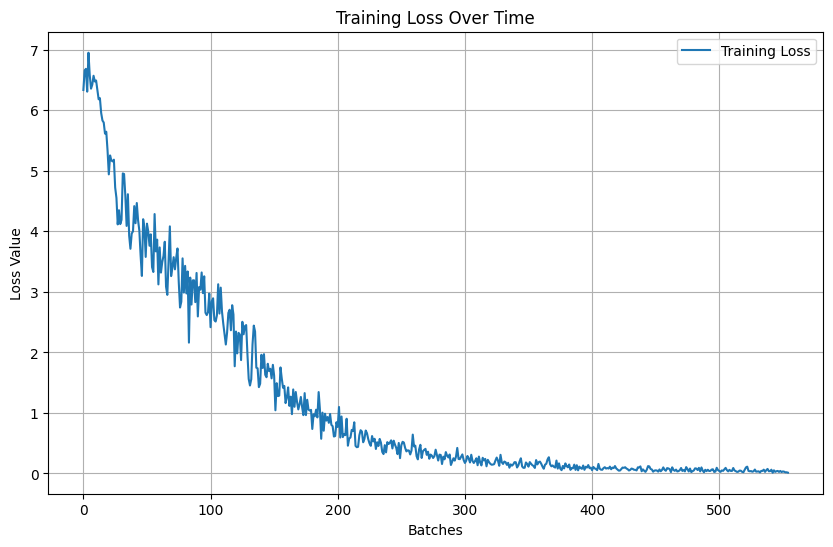

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Batches')
plt.ylabel('Loss Value')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
predictions = np.vstack(predictions)

In [59]:
predictions[0,0]

array([-0.49820694,  0.4781361 , -1.8001904 , -1.2360493 , -0.61119246, -0.0307138 ,  0.56337595, -0.3776486 ,  0.26784325,  0.42837203, -0.26863712, -0.34459233,  0.73411155,  1.3680257 ,  0.32626566,  1.7283027 ,  1.6749468 ,  2.3565123 ,  2.2638416 , -0.20516956, -0.8067938 , -2.4872236 ,
        0.34090948,  0.6108086 , -0.2981327 , -0.7177971 , -1.2707937 , -0.9703383 ,  1.625971  ,  1.1012738 , -0.6871612 ,  0.48794803, -2.6464057 , -0.14029011,  1.0032878 , -1.1588645 , -0.18485507, -0.22059517,  0.6514392 ,  2.2871394 , -1.659802  ,  1.8918692 , -1.3801821 ,  1.3177066 ,
        0.6101354 ,  0.30399287, -1.6185544 ,  0.36624172, -2.0590782 , -2.053397  , -0.7407918 , -0.13476992,  0.07453978,  0.7273027 , -0.12400948,  1.733939  ,  0.14485464, -0.8500798 ,  1.4976056 ,  0.95835036, -0.8430932 ,  0.6327473 , -1.0452745 , -1.5826347 ,  1.8663112 ,  0.54238236,
        0.05179882,  0.99999756,  0.2630214 ,  0.95674753, -0.07485616,  1.3169785 , -1.143208  ,  0.7634748 ,  0.5556192

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def plot_prediction_bar_chart(predictions, word_labels=None):
    """
    Plots a bar chart of predicted word likelihoods.

    Parameters:
        predictions (np.ndarray): Array of probabilities (likelihoods) between 0 and 1.
        word_labels (list, optional): List of labels corresponding to the predictions. 
                                       If None, default labels will be used.
    """
    # Validate the input
    if not isinstance(predictions, np.ndarray):
        raise ValueError("Predictions should be a numpy array.")
    
    predictions = np.maximum(predictions, 0)
    num_predictions = len(predictions)
    
    # Create default word labels if none are provided
    if word_labels is None:
        word_labels = [f'Word {i}' for i in range(num_predictions)]

    # Create a bar chart
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(word_labels, predictions, color='skyblue')  # Create bar chart

    # Add titles and labels
    plt.title('Predicted Word Likelihoods')
    plt.xlabel('Words')
    plt.ylabel('Likelihood (Probability)')
    # plt.ylim(0, 1)  # Set the y-axis limit to 0 and 1

    # Show the probability values on top of the bars
    # for i, v in enumerate(predictions):
    #     plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

    # Display the bar chart
    plt.show()

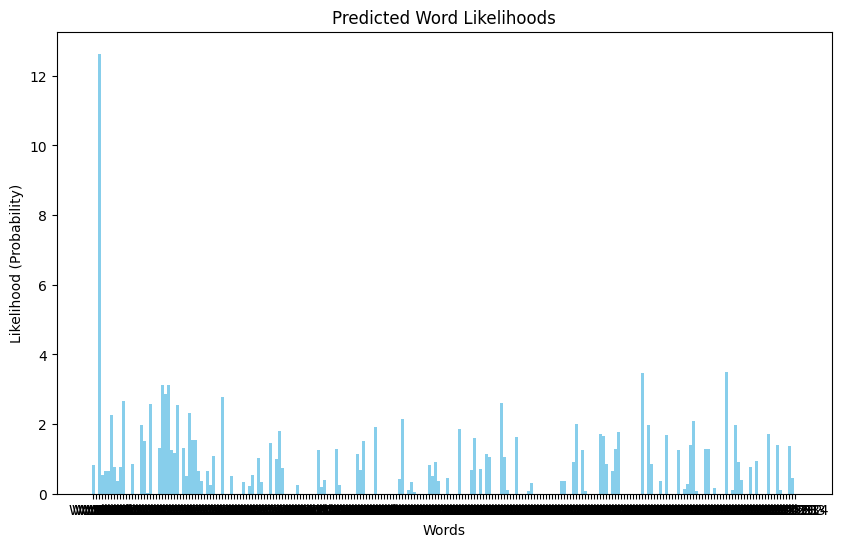

In [67]:
plot_prediction_bar_chart(predictions[20000,0])

In [63]:
trainY_categorical.shape

(35483, 5)

In [62]:
predictions.shape

(35483, 5, 235)

In [65]:
trainY_categorical[20000,0]

2

In [66]:
predictions[20000,0]

array([ 8.2417774e-01, -5.3750578e-02,  1.2632398e+01,  5.4579693e-01,  6.5488422e-01,  6.4393109e-01,  2.2560694e+00,  7.7467799e-01,  3.7062296e-01,  7.6388264e-01,  2.6536288e+00, -5.4746807e-02, -4.7284785e-01,  8.5828906e-01, -1.2991976e+00, -1.3310846e+00,  1.9698353e+00,  1.5206512e+00,
        1.4642120e-02,  2.5648029e+00, -4.5042017e-01, -8.9414245e-01,  1.3064494e+00,  3.1200869e+00,  2.8529406e+00,  3.1263659e+00,  1.2507272e+00,  1.1562656e+00,  2.5597281e+00, -4.9141216e-01,  1.3262933e+00,  5.1628041e-01,  2.3110111e+00,  1.5315820e+00,  1.5458562e+00,  6.4550632e-01,
        3.7463343e-01, -3.7644047e-01,  6.6402084e-01,  2.6401761e-01,  1.0726534e+00, -7.5128692e-01, -1.2379986e+00,  2.7817464e+00, -7.1880925e-01, -2.3747875e-01,  5.2133381e-01, -1.5289198e+00, -9.1950810e-01, -7.2970182e-01,  3.3074090e-01, -6.5326911e-01,  2.2111267e-01,  5.3944522e-01,
       -6.6822752e-02,  1.0344256e+00,  3.2885304e-01, -1.2096775e+00, -2.9837074e+00,  1.4521884e+00, -1.8073403e+

In [71]:
max(predictions[20000,0])

12.632398

In [80]:
likelihood_errors = np.zeros(trainY_categorical.shape)
for i, (event_pred, event_true) in enumerate(zip(predictions, trainY_categorical)):
    for j, (attribute_pred, attribute_true) in enumerate(zip(event_pred, event_true)):
        likelihood_true = attribute_pred[attribute_true]
        likelihood_pred = 0
        for pred in attribute_pred:
            if pred > likelihood_true:
                likelihood_pred += pred
        likelihood_errors[i,j] = likelihood_pred
        
likelihood_errors = np.transpose(likelihood_errors, (1, 0))

In [82]:
likelihood_errors.shape

(5, 35483)

In [90]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines(errors, keys, title='Likelihood Errors per attribute over time', xlabel='Case Index', ylabel='Likelihood Error'):
    plt.figure(figsize=(12, 6))

    for i in range(errors.shape[0]):
        plt.plot(errors[i], label=keys[i])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [91]:
def rolling_average_np(errors, window_size=10):
    kernel = np.ones(window_size) / window_size
    rolling_avg = np.array([np.convolve(attribute, kernel, mode='valid') for attribute in errors])
    return rolling_avg

smoothed_likelihood_errors = rolling_average_np(likelihood_errors, window_size=100)
print(smoothed_likelihood_errors.shape)

(5, 35384)


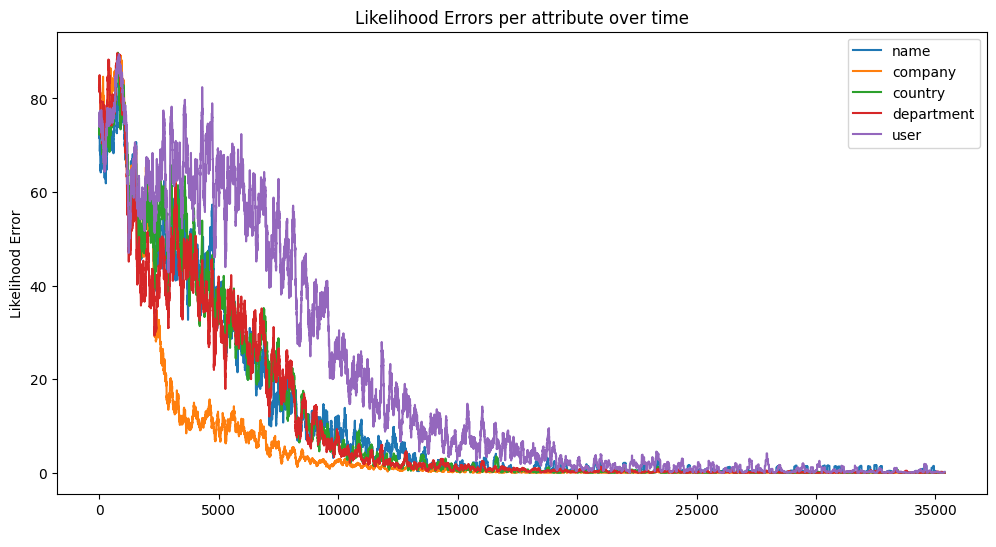

In [92]:
plot_lines(smoothed_likelihood_errors, categorical_keys)